In [31]:
# Load needed packages 
import requests
import os # Interoperable file paths
import pathlib  # Work with file and directory paths

from glob import glob # Find files by pattern
from io import BytesIO # Stream binary (zip) files

import earthaccess
import geopandas as gpd # Work with geospatial data
import rasterio as rio  # Read, write, and manipulate raster datasets
import rasterio.mask # Selectively extract portions of a raster dataset 
import rasterio.merge 
import rioxarray as rxr
import rioxarray.merge as rxrmerge
import xarray as xr
import xrspatial


In [2]:
# Retrieve location data
%store -r

In [3]:
# Define and create the project data directories
data_dir = os.path.join(
    pathlib.Path.home(),
    'GitHub',
    'rivercane_data'
)

os.makedirs(data_dir, exist_ok=True)

<Axes: >

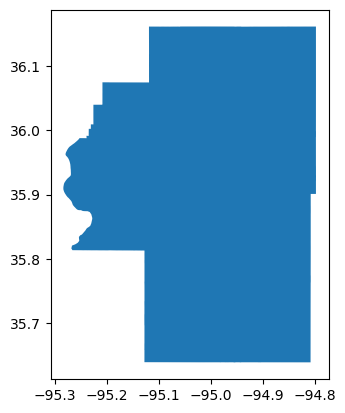

In [5]:
cherokee_county.plot()

In [6]:
earthaccess.login()

In [7]:
datasets = earthaccess.search_datasets(keyword='SRTM DEM', count=11)
for dataset in datasets:
    print(dataset['umm']['ShortName'], dataset['umm']['EntryTitle'])


NASADEM_SHHP NASADEM SRTM-only Height and Height Precision Mosaic Global 1 arc second V001
NASADEM_SIM NASADEM SRTM Image Mosaic Global 1 arc second V001
NASADEM_SSP NASADEM SRTM Subswath Global 1 arc second V001
C_Pools_Fluxes_CONUS_1837 CMS: Terrestrial Carbon Stocks, Emissions, and Fluxes for Conterminous US, 2001-2016
SRTMGL1 NASA Shuttle Radar Topography Mission Global 1 arc second V003
GEDI01_B GEDI L1B Geolocated Waveform Data Global Footprint Level V002
GEDI02_B GEDI L2B Canopy Cover and Vertical Profile Metrics Data Global Footprint Level V002
NASADEM_HGT NASADEM Merged DEM Global 1 arc second V001
SRTMGL3 NASA Shuttle Radar Topography Mission Global 3 arc second V003
SRTMGL1_NC NASA Shuttle Radar Topography Mission Global 1 arc second NetCDF V003
SRTMGL30 NASA Shuttle Radar Topography Mission Global 30 arc second V002


In [15]:
ok_srtm_pattern = os.path.join(data_dir, '*.hgt.zip')
if not glob(ok_srtm_pattern):
    bounds = tuple(cherokee_county.total_bounds)
    ok_srtm_results = earthaccess.search_data(
    short_name="SRTMGL1", 
    bounding_box=bounds
    )
    ok_srtm_results = earthaccess.download(ok_srtm_results, data_dir)

QUEUEING TASKS | :   0%|          | 0/4 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/4 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/4 [00:00<?, ?it/s]

In [16]:
ok_srtm_results

['C:\\Users\\stem2\\GitHub\\rivercane_data\\N36W096.SRTMGL1.hgt.zip',
 'C:\\Users\\stem2\\GitHub\\rivercane_data\\N35W096.SRTMGL1.hgt.zip',
 'C:\\Users\\stem2\\GitHub\\rivercane_data\\N35W095.SRTMGL1.hgt.zip',
 'C:\\Users\\stem2\\GitHub\\rivercane_data\\N36W095.SRTMGL1.hgt.zip']

(array([4.1247230e+06, 2.1422059e+07, 1.2164203e+07, 7.9140330e+06,
        4.7131360e+06, 9.1116400e+05, 4.4048000e+05, 1.4000100e+05,
        3.8054000e+04, 9.5100000e+02]),
 array([ 93.        , 162.30000305, 231.6000061 , 300.90002441,
        370.20001221, 439.5       , 508.80001831, 578.10003662,
        647.40002441, 716.70001221, 786.        ]),
 <BarContainer object of 10 artists>)

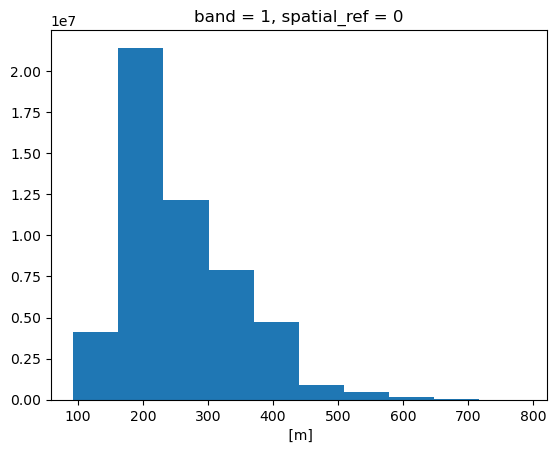

In [33]:
ok_srtm_da_list = []
for ok_srtm_path in glob(ok_srtm_pattern):
    ok_tile_da = rxr.open_rasterio(ok_srtm_path, mask_and_scale=True).squeeze()
    ok_srtm_da_list.append(ok_tile_da)

ok_srtm_da = xr.concat(ok_srtm_da_list, dim='dim_0')
ok_srtm_da.plot()

<Axes: >

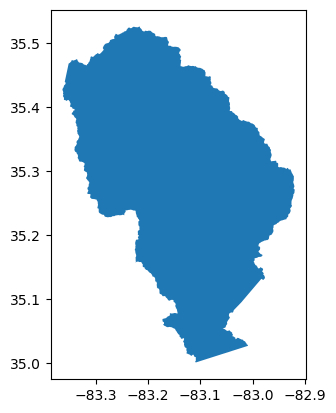

In [22]:
jackson_county.plot()

In [25]:
# Define different data directory for NC
nc_data_dir = os.path.join(
    pathlib.Path.home(),
    'GitHub',
    'habitat_project'
)

os.makedirs(nc_data_dir, exist_ok=True)

In [26]:
nc_srtm_pattern = os.path.join(nc_data_dir, '*.hgt.zip')
if not glob(nc_srtm_pattern):
    bounds = tuple(jackson_county.total_bounds)
    nc_srtm_results = earthaccess.search_data(
    short_name="SRTMGL1", 
    bounding_box=bounds
    )
    nc_srtm_results = earthaccess.download(nc_srtm_results, nc_data_dir)

QUEUEING TASKS | :   0%|          | 0/2 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/2 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/2 [00:00<?, ?it/s]

In [27]:
nc_srtm_results

['C:\\Users\\stem2\\GitHub\\habitat_project\\N35W083.SRTMGL1.hgt.zip',
 'C:\\Users\\stem2\\GitHub\\habitat_project\\N35W084.SRTMGL1.hgt.zip']

(array([4203820., 2834613., 5872891., 5154210., 3655523., 2392401.,
        1138380.,  496759.,  166249.,   19556.]),
 array([ 187.        ,  371.20001221,  555.40002441,  739.59997559,
         923.79998779, 1108.        , 1292.19995117, 1476.40002441,
        1660.59997559, 1844.79992676, 2029.        ]),
 <BarContainer object of 10 artists>)

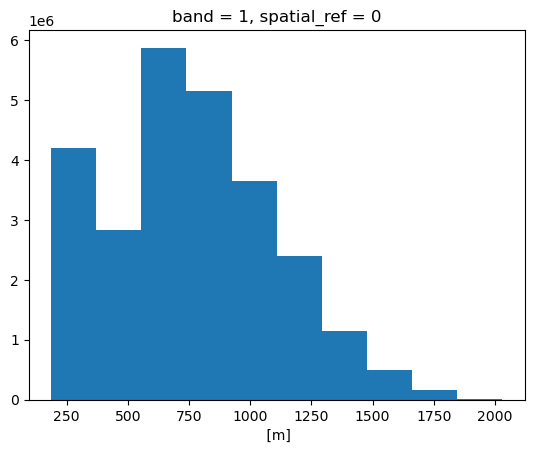

In [35]:
nc_srtm_da_list = []
for nc_srtm_path in glob(nc_srtm_pattern):
    nc_tile_da = rxr.open_rasterio(nc_srtm_path, mask_and_scale=True).squeeze()
    nc_srtm_da_list.append(nc_tile_da)

nc_srtm_da = xr.concat(nc_srtm_da_list, dim='dim_0')
nc_srtm_da.plot()